# Fantasy Premier League Data Gathering

In [76]:
### Fantasy Premier League Data Gathering
# getting JSON data through the premier league API
# https://fantasy.premierleague.com/api/bootstrap-static/
# https://github.com/vaastav/Fantasy-Premier-League/tree/master

!pip install xlsxwriter

# importing libraries
import requests
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt


### Positions:
> positions_table : contains all positions available to choose from


<details>
<summary><b> Data Dictionary </b></summary>

selected_per_team: the number of players in each position in every team

squad_min_play: the minimum number of players in each position in the starting lineup

squad_max_play: the maximum number of players in each position in the starting lineup

</details>

In [77]:
r = requests.get('https://fantasy.premierleague.com/api/bootstrap-static/')
json = r.json()
data_list = []
for i in range(len(json['element_types'])):
    position_ID = json['element_types'][i]['id']
    position = json['element_types'][i]['singular_name_short']
    selected_per_team = json['element_types'][i]['squad_select']
    squad_min_play = json['element_types'][i]['squad_min_play']
    squad_max_play = json['element_types'][i]['squad_max_play']
    # Append a dictionary to the list for the current iteration
    data_list.append({
        "position_ID": position_ID,
        "position": position,
        "selected_per_team": selected_per_team,
        "squad_min_play": squad_min_play,
        "squad_max_play": squad_max_play
    })
positions_table = pd.DataFrame(data_list)
display(positions_table)


,position_ID,position,selected_per_team,squad_min_play,squad_max_play
0,1,GKP,2,1,1
1,2,DEF,5,3,5
2,3,MID,5,2,5
3,4,FWD,3,1,3


### Teams:
> teams_data22 (season 22-23) and teams_data21 (season 21-22): contains all teams in the respective seasons

<details>
<summary><b> Data Dictionary </b></summary>

id : team unique id

strength : team overall strength rating out of 5

strength_overall_home: team strength in home matches out of 1400

strength_overall_away: team strength in away matches out of 1400

</details>

In [78]:
teams_data22 = pd.read_csv("https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2022-23/teams.csv")
teams_data22 = teams_data22[['id', 'name', 'strength', 'strength_overall_home', 'strength_overall_away']]
teams_data21 = pd.read_csv("https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2021-22/teams.csv")
teams_data21 = teams_data21[['id', 'name', 'strength', 'strength_overall_home', 'strength_overall_away']]
teams_data22

,id,name,strength,strength_overall_home,strength_overall_away
0,1,Arsenal,4,1245,1285
1,2,Aston Villa,3,1070,1100
2,3,Bournemouth,2,1035,1095
3,4,Brentford,3,1115,1180
4,5,Brighton,3,1170,1175
5,6,Chelsea,3,1165,1220
6,7,Crystal Palace,3,1085,1100
7,8,Everton,3,1055,1095
8,9,Fulham,3,1095,1100
9,10,Leicester,3,1130,1115


### Fixtures:
> fixtures 21 and fixtures 22: contains all the fixtures in the respective seasons


<details>
<summary><b> Data Dictionary </b></summary>

game_id: unique game id for each fixture

Gameweek: gameweek number from 1 to 38
</details>

In [79]:
fixtures = pd.read_csv("https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2021-22/fixtures.csv")
fixtures21 = pd.DataFrame(columns=['game_id', 'date', 'Gameweek', 'Home Team','Away Team', 'Home Team ID', 'Away Team ID', 'Home Team Score', 'Away Team Score'])
for i in range(len(fixtures)):
    fixtures21.loc[i, 'game_id'] = fixtures.loc[i, 'id']
    fixtures21.loc[i, 'date'] = fixtures.loc[i, 'kickoff_time']
    fixtures21.loc[i, 'Gameweek'] = fixtures.loc[i, 'event']
    team_h_id = fixtures.loc[i, 'team_h']
    team_name = teams_data21.loc[teams_data21['id'] == team_h_id, 'name'].values[0]
    fixtures21.loc[i, 'Home Team'] = team_name
    team_a_id = fixtures.loc[i, 'team_a']
    team_name = teams_data21.loc[teams_data21['id'] == team_a_id, 'name'].values[0]
    fixtures21.loc[i, 'Away Team'] = team_name
    fixtures21.loc[i, 'Home Team ID'] = fixtures.loc[i, 'team_h']
    fixtures21.loc[i, 'Away Team ID'] = fixtures.loc[i, 'team_a']
    fixtures21.loc[i, 'Home Team Score'] = fixtures.loc[i, 'team_h_score']
    fixtures21.loc[i, 'Away Team Score'] = fixtures.loc[i, 'team_a_score']


fixtures = pd.read_csv("https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2022-23/fixtures.csv")
fixtures22 = pd.DataFrame(columns=['game_id', 'date', 'Gameweek', 'Home Team','Away Team', 'Home Team ID', 'Away Team ID', 'Home Team Score', 'Away Team Score'])
for i in range(len(fixtures)):
    fixtures22.loc[i, 'game_id'] = fixtures.loc[i, 'id']
    fixtures22.loc[i, 'date'] = fixtures.loc[i, 'kickoff_time']
    fixtures22.loc[i, 'Gameweek'] = fixtures.loc[i, 'event']
    team_h_id = fixtures.loc[i, 'team_h']
    team_name = teams_data22.loc[teams_data22['id'] == team_h_id, 'name'].values[0]
    fixtures22.loc[i, 'Home Team'] = team_name
    team_a_id = fixtures.loc[i, 'team_a']
    team_name = teams_data22.loc[teams_data22['id'] == team_a_id, 'name'].values[0]
    fixtures22.loc[i, 'Away Team'] = team_name
    fixtures22.loc[i, 'Home Team ID'] = fixtures.loc[i, 'team_h']
    fixtures22.loc[i, 'Away Team ID'] = fixtures.loc[i, 'team_a']
    fixtures22.loc[i, 'Home Team Score'] = fixtures.loc[i, 'team_h_score']
    fixtures22.loc[i, 'Away Team Score'] = fixtures.loc[i, 'team_a_score']
fixtures22


,game_id,date,Gameweek,Home Team,Away Team,Home Team ID,Away Team ID,Home Team Score,Away Team Score
0,1,2022-08-05T19:00:00Z,1,Crystal Palace,Arsenal,7,1,0,2
1,4,2022-08-06T11:30:00Z,1,Fulham,Liverpool,9,12,2,2
2,2,2022-08-06T14:00:00Z,1,Bournemouth,Aston Villa,3,2,2,0
3,5,2022-08-06T14:00:00Z,1,Leeds,Wolves,11,20,2,1
4,7,2022-08-06T14:00:00Z,1,Newcastle,Nott'm Forest,15,16,2,0
...,...,...,...,...,...,...,...,...,...
375,376,2023-05-28T15:30:00Z,38,Everton,Bournemouth,8,3,1,0
376,377,2023-05-28T15:30:00Z,38,Leeds,Spurs,11,18,1,4
377,378,2023-05-28T15:30:00Z,38,Leicester,West Ham,10,19,2,1
378,379,2023-05-28T15:30:00Z,38,Man Utd,Fulham,14,9,2,1


### Players Table

#### By Gameweek for current season
> gameweek_data: a dictionary with the key being the gameweek number as an integer (1-38) and value is a dataframe containing all player details for the selected gameweek

<details>
<summary><b> Data Dictionary </b></summary>

Player ID: Unique identifier for each player.

Position: Player's playing position (e.g., forward, midfielder, defender, goalkeeper).

Team: Team to which the player belongs.

xP (Expected Points): The expected fantasy points for the player in a particular fixture.

Assists: Number of assists made by the player.

Bonus: Bonus points earned by the player.

BPS (Bonus Points System): A detailed scoring system to award points based on player performance.

Clean Sheets: Number of games where the player's team did not concede any goals.

Creativity: A metric measuring the player's ability to create goal-scoring opportunities.

Expected Assists: The expected number of assists for the player in a particular fixture.

Expected Goal Involvements: The expected number of goal involvements (goals + assists) for the player in a particular fixture.

Expected Goals: The expected number of goals for the player in a particular fixture.

Expected Goals Conceded: The expected number of goals conceded by the player's team in a particular fixture.

Game ID: Unique identifier for each game/fixture.

Goals Conceded: Number of goals conceded by the player's team.

Goals Scored: Number of goals scored by the player.

ICT Index (Influence, Creativity, Threat): Combined index measuring a player's overall impact on the game.

Influence: A metric measuring the impact of the player on the match.

Minutes: Total minutes played by the player in a particular fixture.

Opponent Team: The team against which the player played in a particular fixture.

Penalties Saved: Number of penalties saved by the player.

Red Cards: Number of red cards received by the player.

Saves: Number of saves made by the player.

Threat: A metric measuring the player's threat level in front of the goal.

Total Points: Total fantasy points earned by the player.

Cost: The cost of the player in the game.

Was Home: Indicates whether the player's team played the fixture at home.

Yellow Cards: Number of yellow cards received by the player.

</details>

In [80]:
main_cols = ['element','name', 'position', 'team', 'xP', 'assists', 'bonus', 'bps','clean_sheets', 'creativity',
 'expected_assists','expected_goal_involvements', 'expected_goals','expected_goals_conceded', 'fixture',
'goals_conceded', 'goals_scored','ict_index', 'influence', 'minutes', 'opponent_team',
'penalties_saved', 'red_cards','saves', 'threat', 'total_points', 'value', 'was_home', 'yellow_cards']
gameweek_data = {}
for i in range(1,39):
    gameweek = pd.read_csv(f"https://github.com/vaastav/Fantasy-Premier-League/blob/master/data/2022-23/gws/gw{i}.csv?raw=true")
    gameweek = gameweek[main_cols]
    new_column_names = {'element': 'Player ID','fixture':'gameID','value':'cost'}
    gameweek.rename(columns=new_column_names, inplace=True)
    gameweek['cost'] = gameweek['cost']/10
    gameweek['team_stregnth'] = gameweek['team'].replace(teams_data22.set_index('name')['strength'])
    # #replace gameweek['opponent_team'] with the strength of the team from the teams 2022 table
    gameweek['opponent_team_stregnth'] = gameweek['opponent_team'].replace(teams_data22.set_index('id')['strength'])
    gameweek_data[i] = gameweek


In [81]:
#dealing with double gameweeks
aggregation = {
    'name': 'first',
    'position': 'first',
    'team': 'first',
    'xP': 'sum',
    'assists': 'sum',
    'bonus': 'sum',
    'bps': 'sum',
    'clean_sheets': 'sum',
    'creativity': 'mean',
    'expected_assists': 'sum',
    'expected_goal_involvements': 'sum',
    'expected_goals': 'sum',
    'expected_goals_conceded': 'sum',
    'gameID': 'first',
    'goals_conceded': 'sum',
    'goals_scored': 'sum',
    'ict_index': 'mean',
    'influence': 'mean',
    'minutes': 'sum',
    'opponent_team': 'first',
    'penalties_saved': 'sum',
    'red_cards': 'sum',
    'saves': 'sum',
    'threat': 'mean',
    'total_points': 'sum',
    'cost': 'first',
    'was_home': 'first',
    'yellow_cards': 'sum',
    'team_stregnth': 'first',
    'opponent_team_stregnth': 'mean',
}
for i in range(1,39):
    gameweek_data[i] = gameweek_data[i].groupby('Player ID').agg(aggregation).reset_index() 

In [82]:
#issue with gameweek missing injured players
#need to add players who have not played in a gameweek to the gameweek dataframe
all_players = pd.read_csv("https://github.com/vaastav/Fantasy-Premier-League/blob/master/data/2022-23/players_raw.csv?raw=true")
for index, row in all_players.iterrows():
    for gw in gameweek_data:
        if row['id'] not in gameweek_data[gw]['Player ID'].values:
            aggregation = {
                'Player ID': row['id'],
                'name': row['first_name'] + ' ' + row['second_name'],
                'position': positions_table[positions_table['position_ID'] == row['element_type']]['position'].iloc[0],
                'team': teams_data22[teams_data22['id'] == row['team']]['name'].iloc[0],
                'xP': 0,
                'assists': 0,
                'bonus': 0,
                'bps': 0,
                'clean_sheets': 0,
                'creativity': 0,
                'expected_assists': 0,
                'expected_goal_involvements': 0,
                'expected_goals': 0,
                'expected_goals_conceded': 0,
                'gameID': 0,
                'goals_conceded': 0,
                'goals_scored': 0,
                'ict_index': 0,
                'influence': 0,
                'minutes': 0,
                'opponent_team': 0,
                'penalties_saved': 0,
                'red_cards': 0,
                'saves': 0,
                'threat': 0,
                'total_points': 0,
                'cost': row['now_cost']/10, 
                'was_home': True,
                'yellow_cards': 0,
                'team_stregnth': teams_data22[teams_data22['id'] == row['team']]['strength'].iloc[0],
                'opponent_team_stregnth': 0,
            }
            gameweek_data[gw] = gameweek_data[gw].append(aggregation, ignore_index=True)



C:\Users\moham\AppData\Local\Temp\ipykernel_3264\3691696525.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gameweek_data[gw] = gameweek_data[gw].append(aggregation, ignore_index=True)
C:\Users\moham\AppData\Local\Temp\ipykernel_3264\3691696525.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gameweek_data[gw] = gameweek_data[gw].append(aggregation, ignore_index=True)
C:\Users\moham\AppData\Local\Temp\ipykernel_3264\3691696525.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gameweek_data[gw] = gameweek_data[gw].append(aggregation, ignore_index=True)
C:\Users\moham\AppData\Local\Temp\ipykernel_3264\3691696525.py:40: FutureWarning: In a future version, object-dtype columns with all-bool values will not be includ

> get_aggregate_gameweek_details: This is a function that will return a dataframe with aggregate performances from gameweek 1 to till_gameweek specified. This aggregate should be used along with the individual gameweek fixture specific data to make decisions

In [83]:
def get_aggregate_gameweek_details(till_gameweek):
    if (till_gameweek > 38 or till_gameweek < 1):
        warnings.warn("Gameweek cannot be greater than 38 or smaller than 1")
        return
    res = []
    aggregate = pd.DataFrame(columns = gameweek_data[1].columns)
    for i in range(1,till_gameweek+1):
        aggregate = pd.concat([aggregate, gameweek_data[i]], ignore_index=True)
    for playerid in gameweek_data[till_gameweek]['Player ID'].unique():
        row = gameweek_data[till_gameweek].loc[gameweek_data[till_gameweek]['Player ID'] == playerid]
        playerData = {}
        playerData['Player ID'] = playerid
        playerData['name'] = row['name'].values[0]
        playerData['team_stregnth'] = row['team_stregnth'].values[0]
        playerData['position'] = row['position'].values[0]
        playerData['team'] = row['team'].values[0]
        playerData['cost'] = row['cost'].values[0]
        playerData['minutes'] = aggregate.loc[aggregate['Player ID'] == playerid, 'minutes'].sum()
        playerData['total_points'] = aggregate.loc[aggregate['Player ID'] == playerid, 'total_points'].sum()
        playerData['assists'] = aggregate.loc[aggregate['Player ID'] == playerid, 'assists'].sum()
        playerData['bonus'] = aggregate.loc[aggregate['Player ID'] == playerid, 'bonus'].sum()
        playerData['clean_sheets'] = aggregate.loc[aggregate['Player ID'] == playerid, 'clean_sheets'].sum()
        playerData['goals_scored'] = aggregate.loc[aggregate['Player ID'] == playerid, 'goals_scored'].sum()
        playerData['goals_conceded'] = aggregate.loc[aggregate['Player ID'] == playerid, 'goals_conceded'].sum()
        playerData['saves'] = aggregate.loc[aggregate['Player ID'] == playerid, 'saves'].sum()
        playerData['yellow_cards'] = aggregate.loc[aggregate['Player ID'] == playerid, 'yellow_cards'].sum()
        playerData['red_cards'] = aggregate.loc[aggregate['Player ID'] == playerid, 'red_cards'].sum()
        playerData['penalties_saved'] = aggregate.loc[aggregate['Player ID'] == playerid, 'penalties_saved'].sum()
        playerData['minutes'] = aggregate.loc[aggregate['Player ID'] == playerid, 'minutes'].sum()
        playerData['ict_index'] = aggregate.loc[aggregate['Player ID'] == playerid, 'ict_index'].mean()
        playerData['threat'] = aggregate.loc[aggregate['Player ID'] == playerid, 'threat'].mean()
        playerData['creativity'] = aggregate.loc[aggregate['Player ID'] == playerid, 'creativity'].mean()
        playerData['influence'] = aggregate.loc[aggregate['Player ID'] == playerid, 'influence'].mean()
        playerData['expected_goals'] = aggregate.loc[aggregate['Player ID'] == playerid, 'expected_goals'].mean()
        playerData['expected_assists'] = aggregate.loc[aggregate['Player ID'] == playerid, 'expected_assists'].mean()
        playerData['expected_goal_involvements'] = aggregate.loc[aggregate['Player ID'] == playerid, 'expected_goal_involvements'].mean()
        playerData['expected_goals_conceded'] = aggregate.loc[aggregate['Player ID'] == playerid, 'expected_goals_conceded'].mean()
        res.append(playerData)
    return pd.DataFrame(res)

#display(get_aggregate_gameweek_details(4))
        

        

#### Aggregate season data for previous season
> PlayerData2021: contains aggregated season data for each player in the 2021 - 2022 season


<details>
<summary><b> Data Dictionary </b></summary>

Player ID: Unique identifier for each player.

Total Points: Total fantasy points earned by the player.

Avg Points per Game: Average fantasy points per game played by the player.

Creativity: A metric measuring the player's ability to create goal-scoring opportunities.

Influence: A metric measuring the impact of the player on the match.

Threat: A metric measuring the player's threat level in front of the goal.

Bonus: Bonus points earned by the player.

ICT Index (Influence, Creativity, Threat): Combined index measuring a player's overall impact on the game.

Selected by Percent: Percentage of fantasy managers who have selected the player in their teams.

Cost: Cost of the player in the game.

Position: Player's playing position (e.g., forward, midfielder, defender, goalkeeper).

In Season Dreamteam: Indicates whether the player has been selected in the Fantasy Premier League Dream Team during the current season.

True Season Value: A metric indicating the player's value in terms of fantasy points earned per unit cost.

</details>

In [84]:
players = pd.read_csv("https://github.com/vaastav/Fantasy-Premier-League/blob/master/data/2021-22/cleaned_players.csv?raw=true")
playerIDs = pd.read_csv("https://github.com/vaastav/Fantasy-Premier-League/blob/master/data/2021-22/player_idlist.csv?raw=true")
playersRaw = pd.read_csv("https://github.com/vaastav/Fantasy-Premier-League/blob/master/data/2021-22/players_raw.csv?raw=true")
playersRaw = playersRaw[['first_name', 'second_name','in_dreamteam','points_per_game','value_season','team']]
merged_players = pd.merge(players, playerIDs, how='inner', left_on=['first_name', 'second_name'], right_on=['first_name', 'second_name'])
merged_players = pd.merge(merged_players, playersRaw, how='inner', left_on=['first_name', 'second_name'], right_on=['first_name', 'second_name'])
new_column_names = {'team':'teamID','id': 'Player ID', 'points_per_game': 'avg_points_per_game','in_dreamteam': 'in_season_dreamteam', 'element_type': 'position','now_cost': 'cost', 'value_season': 'True_season_value'}
merged_players.rename(columns=new_column_names, inplace=True)
merged_players['cost'] = merged_players['cost']/10
cols = ["Player ID","teamID",'first_name', 'second_name', 'goals_scored', 'assists', 'total_points', 'avg_points_per_game',
       'minutes', 'goals_conceded', 'creativity', 'influence', 'threat',
       'bonus', 'bps', 'ict_index', 'clean_sheets', 'red_cards',
       'yellow_cards', 'selected_by_percent', 'cost', 'position',
       'in_season_dreamteam', 'True_season_value']
playerData2021 = merged_players[cols]
playerData2021.insert(0, 'full_name', '')



In [85]:
#Removing all players who have left in the current season and making player IDs consistent
amount = 0
allNames = gameweek_data[1]['name'].values.tolist()

for index, row in playerData2021.iterrows():
    toSearch = row['first_name'] + ' ' + row['second_name']
    for name in allNames.copy():  # Create a copy to avoid modification during iteration
        similarity = 0
        for nn in name.upper().split(" "):
            for sub in toSearch.split(' '):
                if sub.upper() == nn:
                    similarity += 1
        if similarity >= 2 and toSearch.split(' ')[0].upper() == name.split(' ')[0].upper():
            # Change row name to name
            condition = (playerData2021['first_name'] == row['first_name']) & (playerData2021['second_name'] == row['second_name'])
            playerData2021.loc[condition, 'full_name'] = name
            playerData2021.loc[condition, 'Player ID'] = gameweek_data[1].loc[gameweek_data[1]['name'] == name, 'Player ID'].values[0]
        
# Assuming 'full_name' is the column you want to check for empty strings
playerData2021.drop(playerData2021[playerData2021['full_name'] == ''].index, inplace=True)
playerData2021

C:\Users\moham\AppData\Local\Temp\ipykernel_3264\3370290248.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerData2021.drop(playerData2021[playerData2021['full_name'] == ''].index, inplace=True)


,full_name,Player ID,teamID,first_name,second_name,goals_scored,assists,total_points,avg_points_per_game,minutes,...,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,cost,position,in_season_dreamteam,True_season_value
0,Bernd Leno,2,1,Bernd,Leno,0,0,10,2.5,360,...,69,8.5,1,0,0,0.8,4.5,GK,False,2.2
2,Willian Borges da Silva,614,1,Willian,Borges Da Silva,0,0,0,0.0,0,...,0,0.0,0,0,0,0.1,6.3,MID,False,0.0
3,Pierre-Emerick Aubameyang,617,1,Pierre-Emerick,Aubameyang,4,1,44,3.1,1036,...,131,92.9,6,0,3,1.2,9.6,FWD,False,4.6
4,Cédric Alves Soares,1,1,Cédric,Soares,1,1,48,2.3,1481,...,292,63.0,3,0,3,0.4,4.2,DEF,False,11.4
6,Granit Xhaka,3,1,Granit,Xhaka,1,2,60,2.2,2327,...,334,112.6,6,1,10,0.4,4.8,MID,False,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,Luke Cundle,485,20,Luke,Cundle,0,0,7,1.8,179,...,32,5.1,1,0,0,0.1,4.4,MID,False,1.6
738,Chem Campbell,568,20,Chem,Campbell,0,0,1,1.0,12,...,5,0.6,0,0,0,0.2,4.4,MID,False,0.2
743,Hugo Bueno López,558,20,Hugo,Bueno,0,0,0,0.0,0,...,0,0.0,0,0,0,0.1,4.0,DEF,False,0.0
745,Toti António Gomes,489,20,Toti António,Gomes,0,0,6,1.5,360,...,52,9.2,0,0,1,0.0,4.4,DEF,False,1.4


## EDA Phase

In [86]:
Data_2022 = get_aggregate_gameweek_details(38)

C:\Users\moham\AppData\Local\Temp\ipykernel_3264\1272478661.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  aggregate = pd.concat([aggregate, gameweek_data[i]], ignore_index=True)


For all players:
* Scoring goals or making assists will add to your points every match
* Earning a yellow or red card will decrease your points every match
* Playing more minutes will give you a chance to earn more points
* As the opponent team strength increases, goalkeepers and defenders have a higher probability of conceding goals, while midfielders and forwards have a higher probability of not scoring or assisting

### GoalKeepers Points

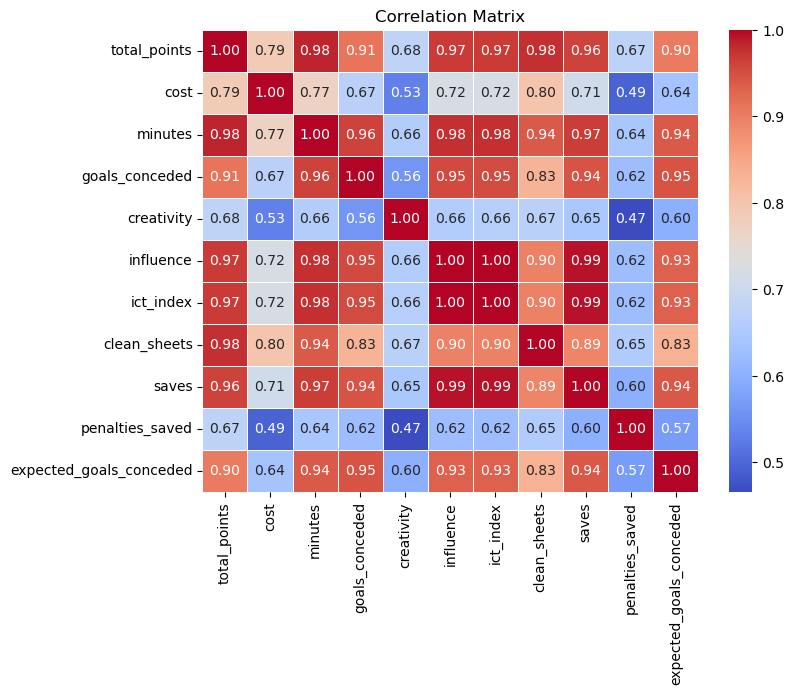

In [87]:
GKData_2022 = Data_2022.loc[Data_2022['position'] == 'GK']
GKData_2022 = GKData_2022[['total_points','cost','minutes', 'goals_conceded', 'creativity', 'influence',
       'ict_index', 'clean_sheets','saves','penalties_saved','expected_goals_conceded']]
correlation_matrix = GKData_2022.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

> Goalkeeper Points are affected by the following:

---> Strong <---

* ICT Index : if a goalkeeper has more influence and creativity in the team, he will likely score more points
* Saves: Goalkeepers get extra points for having more saves made in a match
* Clean Sheets: this is the most way the goalkeeper can earn points
* Minutes: if a goalkeeper has more minutes, he should be able to score more points

---> Weaker <---
* Goals Conceded and Expected Goals Conceded: for every goal conceded, the goalkeeper loses points


### Defender Points

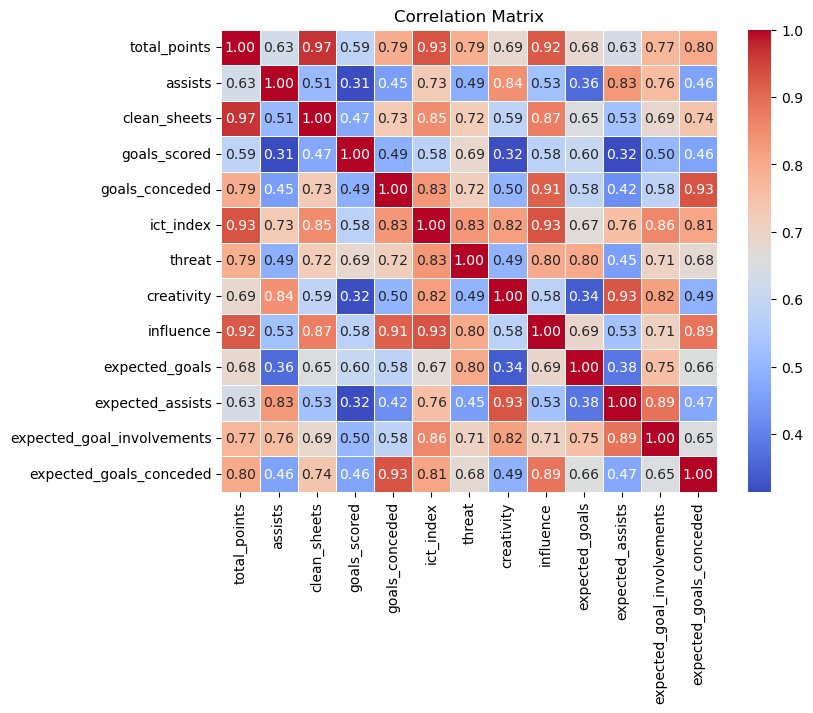

In [88]:
FWDData_2022 = Data_2022.loc[Data_2022['position'] == 'DEF']
FWDData_2022 = FWDData_2022[['total_points', 'assists', 'clean_sheets', 'goals_scored',
       'goals_conceded', 'ict_index', 'threat', 'creativity', 'influence',
       'expected_goals', 'expected_assists', 'expected_goal_involvements',
       'expected_goals_conceded']]

correlation_matrix = FWDData_2022.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

> Defender Points are affected by the following:

---> Strong <---

* ICT Index: if a Defender has more influence and creativity in the team, he will likely score more points
* Clean Sheets: this is one of the most way the Defenders can earn points
* Minutes: if a Defender has more minutes, he should be able to score more points

---> Weaker <---
* Goals Conceded and Expected Goals Conceded: for every goal conceded, the Defender loses points

--> Generally when selecting defenders, we look for defenders that earn more points from assists because that means they have more attacking features. This is reflected from the ict index.


### Midfielder Points

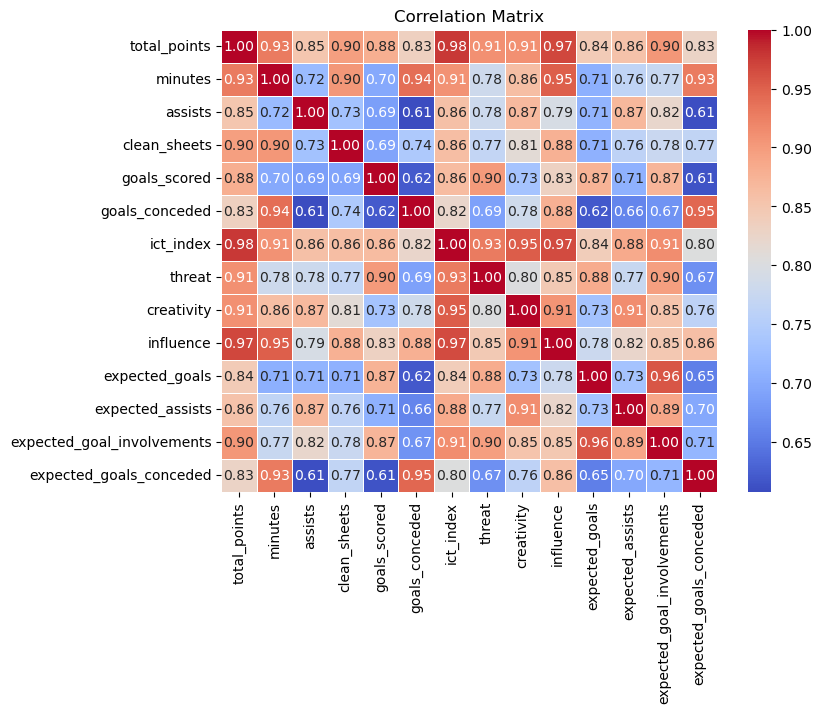

In [89]:
FWDData_2022 = Data_2022.loc[Data_2022['position'] == 'MID']
FWDData_2022 = FWDData_2022[['total_points', 'minutes','assists', 'clean_sheets', 'goals_scored',
       'goals_conceded', 'ict_index', 'threat', 'creativity', 'influence',
       'expected_goals', 'expected_assists', 'expected_goal_involvements',
       'expected_goals_conceded']]

correlation_matrix = FWDData_2022.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

> Midfielder Points are affected by the following:

---> Strong <---

* ICT Index: if a Midfielder has more influence and creativity in the team, he will likely score more points
* Clean Sheets: Midfielder points decrease when no clean sheet is made (also clean sheet probably indicates the match was won)
* Minutes: if a Midfielder has more minutes, he should be able to score more points
* Assists and Goals Scored: best way to earn points 

---> Weaker <---
* Expected Goal Involovement: if a midfielder is involved in more goals, then the probability of scoring points increases

--> Generally when selecting midfielders, we look for midfielders that earn more points from goals and assists because that means they have more attacking features. This is reflected from the ict index.


### Forward Points

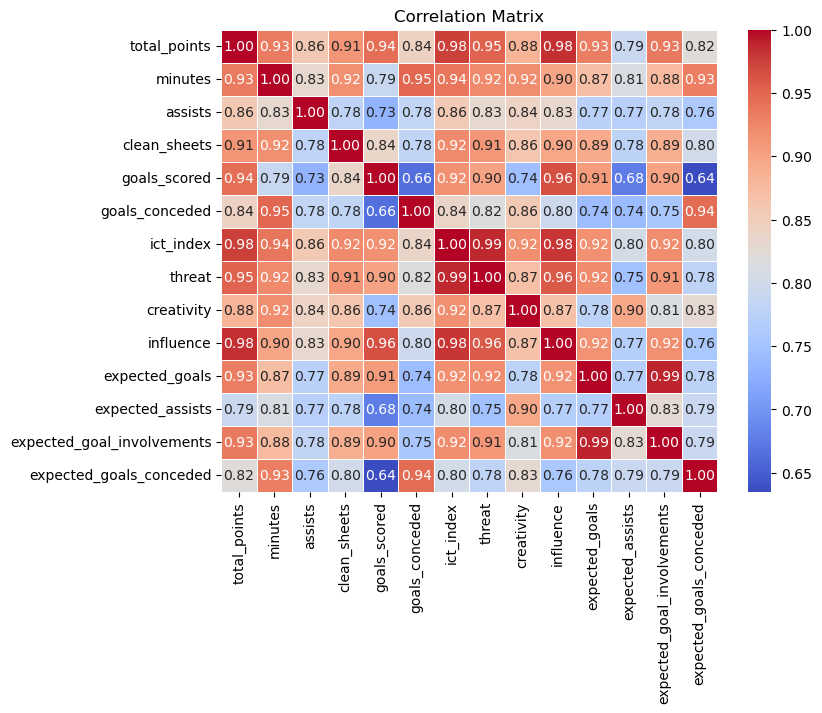

In [90]:
FWDData_2022 = Data_2022.loc[Data_2022['position'] == 'FWD']
FWDData_2022 = FWDData_2022[['total_points', 'minutes','assists', 'clean_sheets', 'goals_scored',
       'goals_conceded', 'ict_index', 'threat', 'creativity', 'influence',
       'expected_goals', 'expected_assists', 'expected_goal_involvements',
       'expected_goals_conceded']]

correlation_matrix = FWDData_2022.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

> Forward Points are affected by the following:

---> Strong <---

* ICT Index: if a Forward has more influence and creativity in the team, he will likely score more points
* Clean Sheets: Forward points decrease when no clean sheet is made (also clean sheet probably indicates the match was won)
* Minutes: if a Forward has more minutes, he should be able to score more points
* Goals Scored: best way to earn points 
* Expected Goal Involovement: if a Forward is involved in more goals, then the probability of scoring points increases
* Expected Goals: if a forward scores more, he will earn more points

---> Weaker <---
* Assists: Forwards usually tend to score more than assist




## Resources:
https://mathematicallysafe.wordpress.com/2017/11/30/fantasy-premier-league-analysis-position-value-and-productivity/


In [91]:
data = get_aggregate_gameweek_details(38)
data.to_csv('Players22.csv', index=False)

C:\Users\moham\AppData\Local\Temp\ipykernel_3264\1272478661.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  aggregate = pd.concat([aggregate, gameweek_data[i]], ignore_index=True)


## Objective Function Decisions

In [92]:
df = pd.read_csv('Players22.csv')
df = df.drop(['Player ID','name','team','bonus'], axis=1)



### LASSO
> Either setting as multiObjective or as One Maximization objective

In [93]:
GK = df.loc[df['position'] == 'GK']
x_GK = GK.drop(['total_points','position','assists','goals_scored'], axis=1)
y_GK = GK['total_points']
from sklearn.linear_model import Lasso
ls = Lasso(alpha=0.01) # you can control the number of predictors through alpha
model = ls.fit(x_GK,y_GK)
pd.DataFrame(list(zip(x_GK.columns,model.coef_)), columns = ['predictor','coefficient']) ## prints a table with all predictors and their coeiff




c:\Users\moham\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.338e+02, tolerance: 2.298e+01
  model = cd_fast.enet_coordinate_descent(


,predictor,coefficient
0,team_stregnth,0.473848
1,cost,0.402883
2,minutes,0.022563
3,clean_sheets,3.830484
4,goals_conceded,-0.649044
5,saves,0.252022
6,yellow_cards,-1.065981
7,red_cards,-1.279828
8,penalties_saved,6.501081
9,ict_index,1.266702


In [94]:

DEF = df.loc[df['position'] == 'DEF']

x_DEF = DEF[['team_stregnth','cost','assists', 'clean_sheets', 'goals_scored',
       'goals_conceded', 'ict_index', 'threat', 'creativity', 'influence',
       'expected_goals', 'expected_assists', 'expected_goal_involvements',
       'expected_goals_conceded']]
y_DEF = DEF['total_points']

ls = Lasso(alpha=0.01) # you can control the number of predictors through alpha
model = ls.fit(x_DEF,y_DEF)
pd.DataFrame(list(zip(x_DEF.columns,model.coef_)), columns = ['predictor','coefficient']) ## prints a table with all predictors and their coeiff




,predictor,coefficient
0,team_stregnth,1.103897
1,cost,0.530888
2,assists,2.630392
3,clean_sheets,6.770899
4,goals_scored,6.008930
5,goals_conceded,0.000848
6,ict_index,0.915476
7,threat,0.096743
8,creativity,0.546564
9,influence,0.935122


In [95]:

MID = df.loc[df['position'] == 'MID']
x_MID = MID[['team_stregnth','cost','minutes','assists', 'clean_sheets', 'goals_scored',
       'goals_conceded', 'ict_index', 'threat', 'creativity', 'influence',
       'expected_goals', 'expected_assists', 'expected_goal_involvements',
       'expected_goals_conceded']]
y_MID = MID['total_points']
ls = Lasso(alpha=0.01) # you can control the number of predictors through alpha
model = ls.fit(x_MID,y_MID)
pd.DataFrame(list(zip(x_MID.columns,model.coef_)), columns = ['predictor','coefficient']) ## prints a table with all predictors and their coeiff




,predictor,coefficient
0,team_stregnth,-0.101506
1,cost,-0.553001
2,minutes,0.023928
3,assists,3.646533
4,clean_sheets,0.881174
5,goals_scored,5.948781
6,goals_conceded,-0.100615
7,ict_index,-0.000000
8,threat,0.139610
9,creativity,0.351276


In [96]:
FWD = df.loc[df['position'] == 'FWD']
x_FWD = FWD[['team_stregnth','cost', 'minutes','assists', 'clean_sheets', 'goals_scored',
       'goals_conceded', 'ict_index', 'threat', 'creativity', 'influence',
       'expected_goals', 'expected_assists', 'expected_goal_involvements',
       'expected_goals_conceded']]
y_FWD = FWD['total_points']
ls = Lasso(alpha=0.01) # you can control the number of predictors through alpha
model = ls.fit(x_FWD,y_FWD)
pd.DataFrame(list(zip(x_FWD.columns,model.coef_)), columns = ['predictor','coefficient']) ## prints a table with all predictors and their coeiff


,predictor,coefficient
0,team_stregnth,1.189882
1,cost,0.429152
2,minutes,0.031191
3,assists,3.193599
4,clean_sheets,-0.729885
5,goals_scored,5.040497
6,goals_conceded,-0.120736
7,ict_index,-4.287843
8,threat,-0.333383
9,creativity,0.677184


### Historical Perfromance

In [97]:
GK = df.loc[df['position'] == 'GK']
GK = GK.drop(['position','assists','goals_scored'], axis=1)
GK = GK.sort_values(by=['total_points'], ascending=False)
GK = GK.head(7)
# find average value for each column
GK = GK.mean(axis=0)
GK = GK.to_frame()
GK = GK.transpose()
GK


,team_stregnth,cost,minutes,total_points,clean_sheets,goals_conceded,saves,yellow_cards,red_cards,penalties_saved,ict_index,threat,creativity,influence,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded
0,3.428571,5.028571,3333.0,154.142857,12.857143,44.714286,113.571429,1.571429,0.142857,1.0,2.181015,0.007519,0.250752,21.530451,0.000414,0.001475,0.001099,0.854357


In [98]:
DEF = df.loc[df['position'] == 'DEF']
DEF = DEF[['total_points','team_stregnth','cost','assists', 'clean_sheets', 'goals_scored',
       'goals_conceded', 'ict_index', 'threat', 'creativity', 'influence',
       'expected_goals', 'expected_assists', 'expected_goal_involvements',
       'expected_goals_conceded']]
# get to 20 best perfromers by total points
DEF = DEF.sort_values(by=['total_points'], ascending=False)
DEF = DEF.head(13)
# find average value for each column
DEF = DEF.mean(axis=0)
DEF = DEF.to_frame()
DEF = DEF.transpose()
DEF

,total_points,team_stregnth,cost,assists,clean_sheets,goals_scored,goals_conceded,ict_index,threat,creativity,influence,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded
0,140.461538,3.692308,5.484615,4.230769,12.538462,1.461538,36.076923,3.497976,6.475709,12.367814,16.099595,0.043638,0.063767,0.10032,0.720806


In [99]:
MID = df.loc[df['position'] == 'MID']
MID = MID[['total_points','cost','minutes','assists', 'clean_sheets', 'goals_scored',
       'goals_conceded', 'ict_index', 'threat', 'creativity', 'influence',
       'expected_goals', 'expected_assists', 'expected_goal_involvements',
       'expected_goals_conceded','team_stregnth']]
# get to 20 best perfromers by total points
MID = MID.sort_values(by=['total_points'], ascending=False)
MID = MID.head(13)
# find average value for each column
MID = MID.mean(axis=0)
MID = MID.to_frame()
MID = MID.transpose()
MID

,total_points,cost,minutes,assists,clean_sheets,goals_scored,goals_conceded,ict_index,threat,creativity,influence,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,team_stregnth
0,180.769231,7.9,2882.846154,9.230769,12.153846,11.538462,38.076923,6.468117,22.669028,22.270648,19.712753,0.160173,0.110141,0.257318,0.663168,3.692308


In [100]:
FWD = df.loc[df['position'] == 'FWD']
FWD = FWD[['total_points','team_stregnth','cost', 'minutes','assists', 'clean_sheets', 'goals_scored',
       'goals_conceded', 'ict_index', 'threat', 'creativity', 'influence',
       'expected_goals', 'expected_assists', 'expected_goal_involvements',
       'expected_goals_conceded']]
# get to 20 best perfromers by total points
FWD = FWD.sort_values(by=['total_points'], ascending=False)
FWD = FWD.head(10)
# find average value for each column
FWD = FWD.mean(axis=0)
FWD = FWD.to_frame()
FWD = FWD.transpose()
FWD



,total_points,team_stregnth,cost,minutes,assists,clean_sheets,goals_scored,goals_conceded,ict_index,threat,creativity,influence,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded
0,168.3,3.3,7.71,2689.9,6.9,9.8,16.7,38.4,6.015658,30.281579,10.506316,19.476316,0.252573,0.047869,0.275101,0.639465


### Using Xp

In [101]:
for i in range(1,39):
    err = []
    for index, row in gameweek_data[i].iterrows():
        if row['xP'] < row['total_points']:
            err.append(row['total_points'] - row['xP'])
    print(f"gameweek {i} prediction error: {np.median(err)}")


gameweek 1 prediction error: 1.4
gameweek 2 prediction error: 1.0
gameweek 3 prediction error: 0.8999999999999999
gameweek 4 prediction error: 1.0
gameweek 5 prediction error: 0.7
gameweek 6 prediction error: 1.0


c:\Users\moham\anaconda3_new\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\moham\anaconda3_new\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


gameweek 7 prediction error: nan
gameweek 8 prediction error: 1.0
gameweek 9 prediction error: 1.0
gameweek 10 prediction error: 0.7999999999999999
gameweek 11 prediction error: 0.7000000000000002
gameweek 12 prediction error: 2.0
gameweek 13 prediction error: 1.2
gameweek 14 prediction error: 1.0
gameweek 15 prediction error: 0.8
gameweek 16 prediction error: 1.0
gameweek 17 prediction error: 0.5
gameweek 18 prediction error: 1.0
gameweek 19 prediction error: 0.7
gameweek 20 prediction error: 1.0
gameweek 21 prediction error: 1.0
gameweek 22 prediction error: 0.8
gameweek 23 prediction error: 0.8
gameweek 24 prediction error: 0.8
gameweek 25 prediction error: 1.0
gameweek 26 prediction error: 1.0
gameweek 27 prediction error: 1.2
gameweek 28 prediction error: 0.5
gameweek 29 prediction error: 1.0
gameweek 30 prediction error: 1.0
gameweek 31 prediction error: 0.75
gameweek 32 prediction error: 0.8
gameweek 33 prediction error: 0.8
gameweek 34 prediction error: 0.9000000000000001
gamew

### MultiObjective Viz:

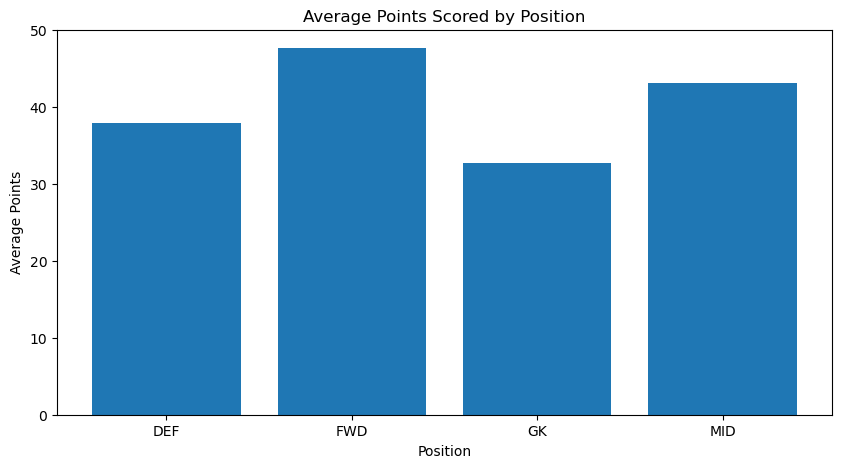

In [102]:
average_points_scored = df.groupby('position')['total_points'].mean()
#plot them in bar graph
plt.figure(figsize=(10,5))
plt.bar(average_points_scored.index, average_points_scored.values)
plt.xlabel('Position')
plt.ylabel('Average Points')
plt.title('Average Points Scored by Position')
plt.show()

## Save everything in Excel Files

In [103]:
#Positions table saving
positions_table.to_csv('positions.csv', index=False)

#Playerdata2021 table saving
playerData2021.to_csv('PlayerData21.csv', index=False)


In [104]:
#gameweek_data table saving
excel_writer = pd.ExcelWriter("gameweek22.xlsx", engine='xlsxwriter')

# Iterate through the dictionary and save each DataFrame in a separate sheet
for key, value in gameweek_data.items():
    value.to_excel(excel_writer, sheet_name=str(key), index=False)

# Save and close the Excel writer
excel_writer.save()

C:\Users\moham\AppData\Local\Temp\ipykernel_3264\3804713370.py:9: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  excel_writer.save()


In [105]:
#gameweek 7 is empty because week was postponed due to Queen Elizabeth death
#gameweek_data table saving
data_dict = {}
for i in range(2, 39):
    data_dict[i] = get_aggregate_gameweek_details(i)

# Specify the Excel file path
excel_file_path = 'Aggregate_gameweek22.xlsx'

# Create an Excel writer with the 'openpyxl' engine
excel_writer = pd.ExcelWriter(excel_file_path, engine='openpyxl')

# Iterate through the dictionary and save each DataFrame in a separate sheet
for key, value in data_dict.items():
    value.to_excel(excel_writer, sheet_name=str(key), index=False)

# Save and close the Excel writer
excel_writer.save()

C:\Users\moham\AppData\Local\Temp\ipykernel_3264\1272478661.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  aggregate = pd.concat([aggregate, gameweek_data[i]], ignore_index=True)
C:\Users\moham\AppData\Local\Temp\ipykernel_3264\1272478661.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  aggregate = pd.concat([aggregate, gameweek_data[i]], ignore_index=True)
C:\Users\moham\AppData\Local\Temp\ipykernel_3264\1272478661.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  aggregate = pd.concat([aggregate, gameweek_data[i]], ignore_index=True)
C:\Users\moham\AppData\Local\Temp\ipykernel_3264\1272478661.p